In [1]:
import tensorflow as tf

2022-09-03 18:18:05.008982: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-03 18:18:05.009031: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
a = -2
tf.abs(a)

2022-09-03 18:18:07.614848: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-03 18:18:07.616910: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-09-03 18:18:07.939340: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-03 18:18:07.939403: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mfaizan-HP-ProBook-640-G2): /proc/driver/nvidia/version does not exist
2022-09-03 18:18:07.940538: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
202

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [7]:
import numpy as np
from tensorflow import keras
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0, 9.0], dtype=float)
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
history = model.fit(xs, ys, epochs=500, verbose=0)

In [8]:
inp = float(input('please enter the desired input for output prediction: '))
print("predicted_output: ", np.round(model.predict([inp])[0][0]))

please enter the desired input for output prediction: 10
predicted_output:  19.0


In [9]:
def huber_loss(y_true, y_pred):
    error = y_true - y_pred
    delta_thresh = 1
    is_small = tf.abs(error) <= delta_thresh
    small_error = 0.5*tf.square(error)
    big_error = delta_thresh*(tf.abs(error) - 0.5*delta_thresh)
    return tf.where(is_small, small_error, big_error)

In [10]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss=huber_loss)
history = model.fit(xs, ys, epochs=500, verbose=0)

In [11]:
inp = float(input('please enter the desired input for output prediction: '))
print("predicted_output: ", np.round(model.predict([inp])[0][0]))

please enter the desired input for output prediction: 6
predicted_output:  11.0


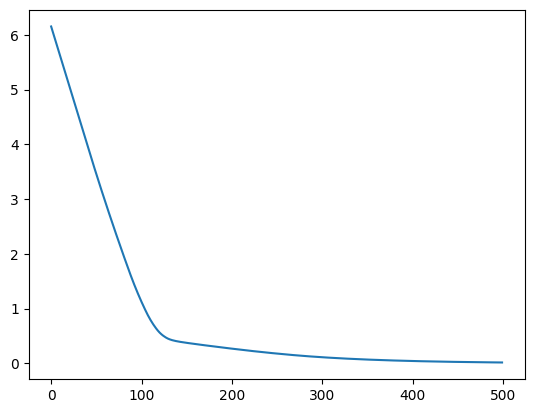

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])